<a href="https://colab.research.google.com/github/Fatma-Chaouech/NLP/blob/main/Semantic_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the data

In [78]:
import pandas as pd
import re
import spacy
import string
import numpy as np

In [85]:
train = pd.read_csv("/content/drive/MyDrive/datasets/movies/Train.csv")
valid = pd.read_csv("/content/drive/MyDrive/datasets/movies/Valid.csv")
#test = pd.read_csv("/content/drive/MyDrive/datasets/movies/Test.csv")

In [86]:
# dataset = pd.concat([train,valid])
# dataset.reset_index(inplace = True)
# dataset.head()
valid.text[0]

'It\'s been about 14 years since Sharon Stone awarded viewers a leg-crossing that twisted many people\'s minds. And now, God knows why, she\'s in the game again. "Basic Instinct 2" is the sequel to the smash-hit erotica "Basic Instinct" featuring a sexy Stone and a vulnerable Michael Douglas. However, fans of the original might not even get close to this one, since "Instinct 2" is painful film-making, as the mediocre director Michael Caton-Jones assassinates the legacy of the first film.<br /><br />The plot of the movie starts when a car explosion breaks in right at the beginning. Catherine Tramell (Sharon Stone, trying to look forcefully sexy) is a suspect and appears to be involved in the murder. A psychiatrist (a horrible David Morrisey) is appointed to examine her, but eventually falls for an intimate game of seduction.<br /><br />And there it is, without no further explanations, the basic force that moves this "Instinct". Nothing much is explained and we have to sit through a slea

### Clean and pre-process the data

In [87]:
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

def spacy_tokenizer(sentence):

  sentence = re.sub('\'','',sentence)
  sentence = re.sub('\w*\d\w*','',sentence)
  sentence = re.sub('\([^(]*\)','',sentence)
  sentence = re.sub('\<[^<]*\>','',sentence)
  sentence = re.sub(r'\n: \'\'.*','',sentence)
  sentence = re.sub(r'\n!.*','',sentence)
  sentence = re.sub(r'^:\'\'.*','',sentence)
  sentence = re.sub(r'\n',' ',sentence)
  #remove punctunations
  sentence = re.sub(r'[^\w\s]',' ',sentence)
  sentence = re.sub(' +',' ',sentence)
  tokens= nlp(sentence)
  tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
  tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]
  return tokens

In [88]:
valid['text'] = valid['text'].map(lambda x: spacy_tokenizer(x))
valid.text

['guidelines',
 'state',
 'comment',
 'contain',
 'minimum',
 'line',
 'reason',
 'tomcat',
 'line',
 'summary',
 'absolutely',
 'remotely',
 'entertaining',
 'film']

In [90]:
valid.text

0       [year, sharon, stone, award, viewer, leg, cros...
1       [need, car, payment, truly, awful, jean, claud...
2       [guidelines, state, comment, contain, minimum,...
3       [movie, muddle, mish, mash, clichés, recent, c...
4       [stan, laurel, small, half, time, great, comed...
                              ...                        
4995    [man, love, movie, kid, day, teacher, classroo...
4996    [recovery, incredibly, piece, work, handle, de...
4997    [crook, joint, exceedingly, difficult, joint, ...
4998    [futz, preserve, experimental, theatre, moveme...
4999    [mother, tell, recently, widow, mid, mother, a...
Name: text, Length: 5000, dtype: object

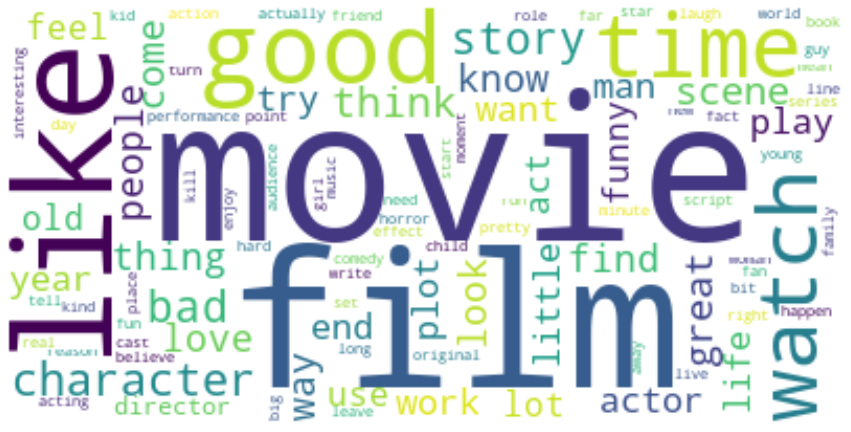

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(valid['text'])).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Building Word Dictionary

In [92]:
from gensim import corpora

dictionary = corpora.Dictionary(valid['text'])

dictionary.filter_extremes(no_below=4, no_above=0.2)

stoplist = set('hello and if this can would should could tell ask stop come go')
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)
dict_tokens = [[[dictionary[key], dictionary.token2id[dictionary[key]]] for key, value in dictionary.items() if key <= 50]]
print (dict_tokens)

[[['acting', 0], ['amateurish', 1], ['appear', 2], ['appoint', 3], ['arouse', 4], ['assassinate', 5], ['award', 6], ['basic', 7], ['beginning', 8], ['break', 9], ['car', 10], ['careless', 11], ['catherine', 12], ['caton', 13], ['chemistry', 14], ['class', 15], ['close', 16], ['compelling', 17], ['confuse', 18], ['continue', 19], ['cronenberg', 20], ['crossing', 21], ['david', 22], ['dialogue', 23], ['direction', 24], ['director', 25], ['douglas', 26], ['drop', 27], ['easy', 28], ['entrance', 29], ['erotic', 30], ['eventually', 31], ['examine', 32], ['expect', 33], ['explain', 34], ['explanation', 35], ['explosion', 36], ['expression', 37], ['extremely', 38], ['fall', 39], ['fan', 40], ['feature', 41], ['feeling', 42], ['force', 43], ['game', 44], ['god', 45], ['guilty', 46], ['highlight', 47], ['hit', 48], ['horrible', 49], ['huge', 50]]]
